# Helmholtz Hodge Decomposition

In [1]:
# From the repository
from util import *
from read_data import *
data_names = list(name2file_name.keys())
print(data_names)

# Basic modules
import os
import glob
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#name = "wiod2016"
name = data_names[3]
print("We are going to use: " + name)
# Enable original_format to use the format as originally provided
data_dict = get_data(name,original_format=False)
data_dict.keys()
#df_nodes = data_dict["df_nodes"]
df_edges = data_dict["df_edges"]
# Aggregating through time
df_edges_agg = df_edges[["source","target"]].copy()
df_edges_agg.drop_duplicates(inplace=True)

['blogcatalog', 'homosapiens', 'wikipos', 'enron', 'unvote', 'untrade', 'uslegis_net', 'uslegis_net_small_dyn', 'uslegis_net_dyn', 'uslegis_hyp_dyn', 'contacts', 'dawn_net', 'dawn_hyp', 'ndc_net', 'ndc_hyp', 'coauth_dblp_net', 'coauth_dblp_hyp', 'wiod2016', 'wiod2013', 'wiodlong', 'eth', 'bitcoinalpha', 'bitcoinotc', 'uscourt']
We are going to use: enron


# Move to FALCON

In [ ]:
cd ./import/FALCON

# Compile

In [4]:
%%bash
g++ hh_dcmp.cpp -I Eigen -o hh_dcmp

# Save edgelist

In [5]:
df_edges_agg["weight"] = 1.0

In [6]:
df_edges_agg.to_csv("edgelist.dat",index=False,header=None,sep=" ")

# Run

In [7]:
%%bash
./hh_dcmp edgelist.dat

NbThreads = 1, tol: 1e-10
Input file "edgelist.dat" [3125x3]
Input graph: 184nodes, 3125 links
WCC clusters: 3
HH decompose starts
Complete
#iterations: 15
estimated error: 7.80971e-12
output "edgelist_potential.dat"
output "edgelist_potential_flow.dat"
output "edgelist_loop_flow.dat"
output "edgelist_log.dat"


# Read results

In [8]:
%%bash
head edgelist_log.dat

Input file name: edgelist.dat
Input file: 3125x3
Input graph: 184 nodes, 3007 links
Potential flow ratio: 0.3246511912
Loop flow ratio: 0.6753488088


In [9]:
df_potential = pd.read_csv("edgelist_potential.dat",header=None,sep="\t")
df_potential.columns = ["node","potential"]

# Move back to home directory

In [ ]:
cd ..

In [ ]:
cd ..

# Histogram of pontential values

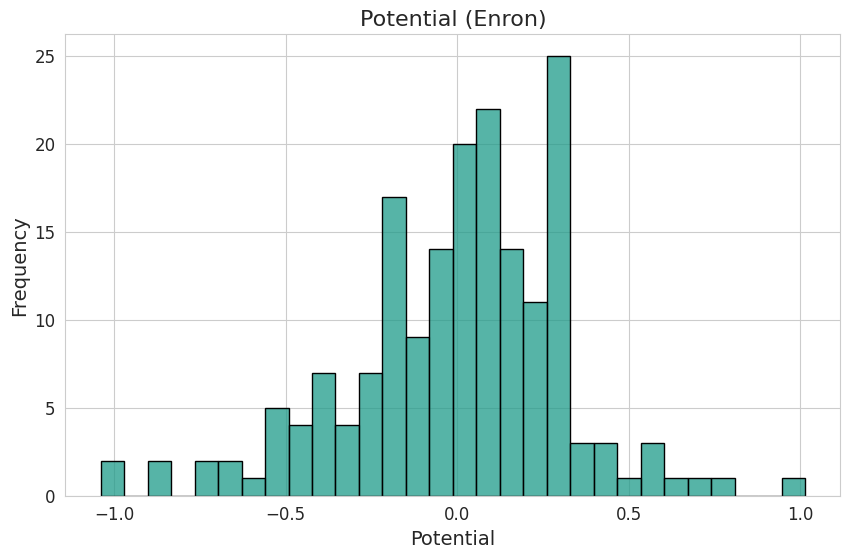

<Figure size 640x480 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a color palette
palette = sns.color_palette("viridis", n_colors=10)

# Create a histogram with Seaborn's `distplot`
plt.figure(figsize=(10, 6))
sns.histplot(df_potential["potential"], bins=30, kde=False, color=palette[5], edgecolor="k")

# Add title and labels
plt.title('Potential (Enron)', fontsize=16)
plt.xlabel('Potential', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()
plt.savefig("./figures/2021_6_1_Enron_potential.pdf",bbox_inches="tight")

In [14]:
cond = df_potential["node"] == 83
print(df_potential.loc[cond])
cond = df_potential["node"] == 106
print(df_potential.loc[cond])
cond = df_potential["node"] == 108
print(df_potential.loc[cond])
cond = df_potential["node"] == 154
print(df_potential.loc[cond])
cond = df_potential["node"] == 168
print(df_potential.loc[cond])

    node  potential
82    83   0.267589
     node  potential
105   106   0.666706
     node  potential
107   108   0.208328
     node  potential
153   154    0.55106
     node  potential
167   168   0.224677


In [15]:
df_potential.sort_values(by="potential",)

node  potential
150   151  -1.038726
164   165  -1.003126
42     43  -0.859959
149   150  -0.841447
111   112  -0.717332
..    ...        ...
74     75   0.714406
11     12   0.788650
135   136   1.014313
71     72        NaN
117   118        NaN

[184 rows x 2 columns]